In [1]:
# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/palestinian-movies-json-dataset/palestinian_movies.json


- Path

In [2]:
json_file_path = '../input/palestinian-movies-json-dataset/palestinian_movies.json'

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

- Read the JSON file into a DataFrame

In [4]:
movies_df = pd.read_json(json_file_path)

- Display the DataFrame

In [5]:
movies_df

,movies
0,"{'titleText': {'text': 'Curfew'}, 'id': 'tt010..."
1,{'titleText': {'text': 'Hikayatul jawahiri tha...
2,"{'titleText': {'text': 'Giraffada'}, 'id': 'tt..."
3,"{'titleText': {'text': 'Gaza mon amour'}, 'id'..."
4,"{'titleText': {'text': 'Farha'}, 'id': 'tt1155..."
5,"{'titleText': {'text': 'Eyes of a Thief'}, 'id..."
6,{'titleText': {'text': 'Habibi Rasak Kharban'}...
7,"{'titleText': {'text': 'Falastine Stereo'}, 'i..."
8,{'titleText': {'text': 'Chronicle of a Disappe...
9,"{'titleText': {'text': 'Laila's Birthday'}, 'i..."


In [6]:
movies_data = movies_df['movies']

In [7]:
movies_df = pd.json_normalize(movies_data, sep='_')

In [8]:
movies_df.head()

,id,titleText_text,primaryImage_id,primaryImage_width,primaryImage_height,primaryImage_url,primaryImage_caption_plainText,releaseDate_day,releaseDate_month,releaseDate_year,releaseDate_country_id,releaseDate_country_text,plot_plotText_plainText,plot_language_id
0,tt0109996,Curfew,rm777481472,315,420,https://m.media-amazon.com/images/M/MV5BZWJhOD...,Curfew (1994),5.0,12.0,1994,US,United States,24 hours of family drama during a curfew annou...,en-US
1,tt0111354,Hikayatul jawahiri thalath,rm4037123328,284,475,https://m.media-amazon.com/images/M/MV5BMTk5MT...,Hikayatul jawahiri thalath (1995),6.0,12.0,1995,FR,France,A Palestinian boy becomes entranced with a bea...,en-US
2,tt3132086,Giraffada,rm2021999616,950,1344,https://m.media-amazon.com/images/M/MV5BNDRiNj...,Ahmad Bayatra in Giraffada (2013),23.0,4.0,2014,FR,France,A male giraffe dies after a nocturnal air raid...,en-US
3,tt11692148,Gaza mon amour,rm2123225857,1080,1617,https://m.media-amazon.com/images/M/MV5BOGViND...,Gaza mon amour (2020),5.0,11.0,2021,US,United States,"Gaza, today. Sixty-year-old fisherman Issa is ...",en-US
4,tt11555492,Farha,rm2816411393,4000,5684,https://m.media-amazon.com/images/M/MV5BM2NiMD...,Karam Taher and Ashraf Barhom in Farha (2021),1.0,12.0,2022,US,United States,A 14-year-old girl in 1948 Palestine watches f...,en-US


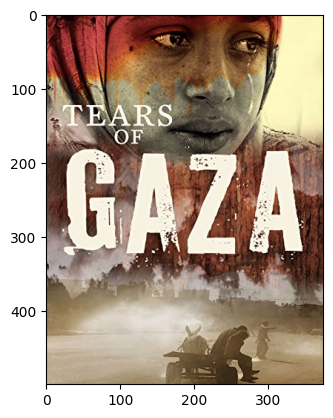

In [9]:
from PIL import Image
import requests

im = Image.open(requests.get(movies_df['primaryImage_url'].iloc[25], stream=True).raw)
plt.imshow(im)
plt.show()

- Missing Values

In [10]:
missing_values = movies_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                                0
titleText_text                    0
primaryImage_id                   0
primaryImage_width                0
primaryImage_height               0
primaryImage_url                  0
primaryImage_caption_plainText    0
releaseDate_day                   7
releaseDate_month                 5
releaseDate_year                  0
releaseDate_country_id            0
releaseDate_country_text          0
plot_plotText_plainText           0
plot_language_id                  0
dtype: int64


- Summary Statistics:

In [11]:
movies_df.describe()

,primaryImage_width,primaryImage_height,releaseDate_day,releaseDate_month,releaseDate_year
count,40.000000,40.000000,33.000000,35.000000,40.000000
mean,1162.850000,1562.250000,13.363636,7.057143,2011.025000
std,1503.822728,2114.058168,9.370226,3.741208,8.368094
min,229.000000,316.000000,1.000000,1.000000,1994.000000
25%,369.250000,500.000000,5.000000,4.000000,2007.000000
50%,640.000000,809.500000,13.000000,6.000000,2013.500000
75%,1080.000000,1529.250000,20.000000,10.500000,2017.250000
max,8100.000000,12000.000000,31.000000,12.000000,2022.000000


- Distribution of Release Years

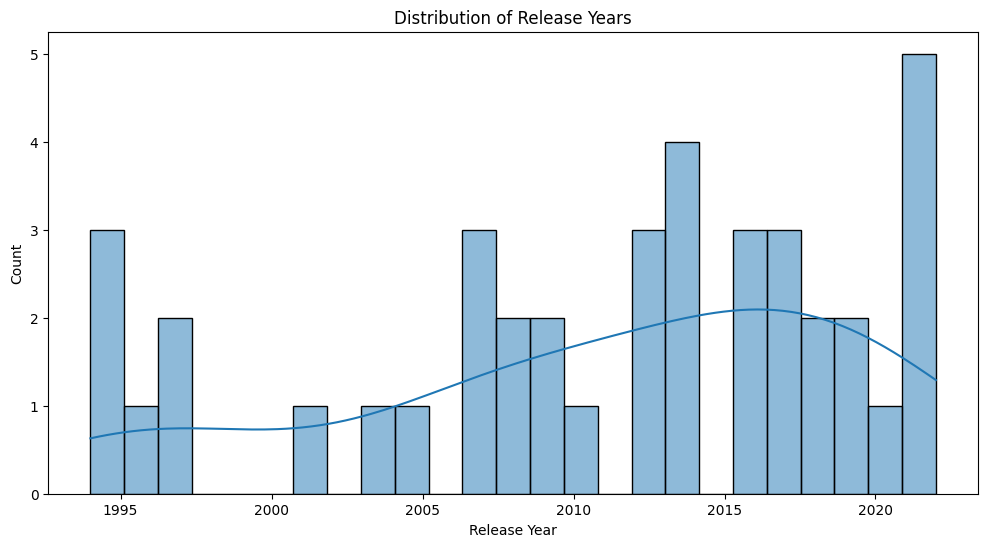

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['releaseDate_year'], bins=25, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

- Countries realese

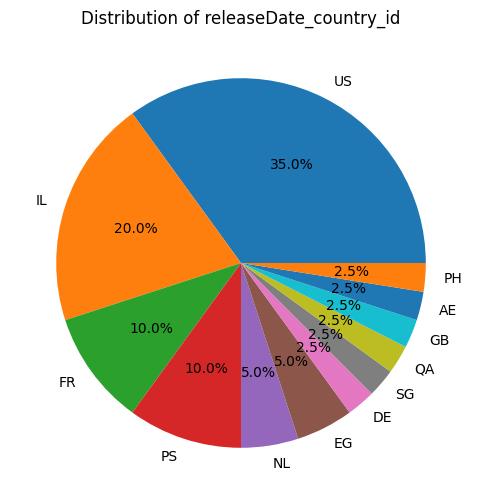

In [13]:
release_count = movies_df['releaseDate_country_id'].value_counts()
plt.figure(figsize=(12, 6))
plt.pie(release_count, labels=release_count.index, autopct='%1.1f%%')
plt.title('Distribution of releaseDate_country_id')
plt.show()